Preprocessing.

Install the newest versionn of scikit learn.

In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\kensh\anaconda3\lib\site-packages (0.23.2)


In [2]:
import pandas as pd
df=pd.read_csv("df_new.csv")
df.head()

,id,reason_for_absence,month_of_absence,day_of__the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absenteeism_category
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,1
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,1
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,1
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,1


In [3]:
df.shape

(740, 22)

The dataset loaded here has an extra column: absenteeism_cateogry. Each class in the column represents the number of 8-hour workdays. For example, class 3 consists of employees who were absent for 3 days. To do the clustering, I connected to IBM’s Db2 so that I could write the SQL query in Python. The dataset has been transformed by the SQL statement before it is loaded here.

In [4]:
df.groupby(["absenteeism_category"])["absenteeism_category"].count()

absenteeism_category
0      44
1     633
2      19
3      16
4       6
5       7
6       1
7       2
8       3
10      9
Name: absenteeism_category, dtype: int64

Uneven class distribution.

Calibrated dataset with synthetic data for minority classes.

In [5]:
df=pd.read_csv("absenteeism_recalibrated.csv")
df.head()

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absenteeism_category
0,0,10,2,4,225,26,9,28,284.853,91,...,1,1,0,0,2,69,169,24,0,0
1,0,7,5,1,260,50,11,36,275.312,98,...,1,4,1,0,0,65,168,23,0,0
2,0,0,4,2,231,35,14,39,271.219,95,...,1,2,1,0,2,100,170,35,0,0
3,0,9,2,4,260,50,11,36,241.476,92,...,1,4,1,0,0,65,168,23,0,0
4,0,5,4,3,378,49,11,36,378.884,92,...,1,2,0,1,4,65,174,21,0,0


In [6]:
df.groupby(["absenteeism_category"])["absenteeism_category"].count()

absenteeism_category
0     150
1     633
2     100
3     100
4     100
5     100
6     100
7     100
8     100
10    100
Name: absenteeism_category, dtype: int64

In [7]:
X=df.drop(["absenteeism_time_in_hours","absenteeism_category"],axis=1)
X.head()

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index
0,0,10,2,4,225,26,9,28,284.853,91,1,1,1,0,0,2,69,169,24
1,0,7,5,1,260,50,11,36,275.312,98,1,1,4,1,0,0,65,168,23
2,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35
3,0,9,2,4,260,50,11,36,241.476,92,1,1,4,1,0,0,65,168,23
4,0,5,4,3,378,49,11,36,378.884,92,1,1,2,0,1,4,65,174,21


In [8]:
y=df[["absenteeism_time_in_hours"]]
y.head()

,absenteeism_time_in_hours
0,0
1,0
2,0
3,0
4,0


In [9]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.822238,0.999912,-1.111799,1.183634,0.147379,-0.051732,-0.959980,-1.385817,0.256479,-0.835660,3.301856,-0.389436,-0.180926,-1.331289,-0.290253,1.312828,-0.788278,-0.613107,-0.530053
1,-1.822238,0.111829,0.986744,-1.573147,0.655377,1.609629,-0.424421,-0.126038,0.016222,0.791748,3.301856,-0.389436,2.376274,0.751152,-0.290253,-0.500616,-1.086040,-0.726795,-0.775539
2,-1.822238,-1.960365,0.287229,-0.654220,0.234465,0.571279,0.378917,0.346380,-0.086846,0.094287,-0.302860,-0.389436,0.671474,0.751152,-0.290253,1.312828,1.519375,-0.499420,2.170301
3,-1.822238,0.703884,-1.111799,1.183634,0.655377,1.609629,-0.424421,-0.126038,-0.835822,-0.603173,3.301856,-0.389436,2.376274,0.751152,-0.290253,-0.500616,-1.086040,-0.726795,-0.775539
4,-1.822238,-0.480227,0.287229,0.264707,2.368056,1.540406,-0.424421,-0.126038,2.624327,-0.603173,3.301856,-0.389436,0.671474,-1.331289,3.445275,3.126273,-1.086040,-0.044671,-1.266513


In [10]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

test=SelectKBest(score_func=f_regression,k="all")
fit=test.fit(X,y)
features=fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

C:\Users\kensh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,scores
10,123.659737
5,84.803705
17,83.577301
0,57.242520
18,53.165402
12,48.777573
2,44.531750
7,28.104730
9,26.015382
15,23.149123


In [11]:
scores=scores[scores["scores"]>10]
scores

,scores
10,123.659737
5,84.803705
17,83.577301
0,57.242520
18,53.165402
12,48.777573
2,44.531750
7,28.104730
9,26.015382
15,23.149123


In [12]:
X=X.iloc[:,scores.index]
X.head()

,10,5,17,0,18,12,2,7,9,15,4
0,3.301856,-0.051732,-0.613107,-1.822238,-0.530053,-0.180926,-1.111799,-1.385817,-0.835660,1.312828,0.147379
1,3.301856,1.609629,-0.726795,-1.822238,-0.775539,2.376274,0.986744,-0.126038,0.791748,-0.500616,0.655377
2,-0.302860,0.571279,-0.499420,-1.822238,2.170301,0.671474,0.287229,0.346380,0.094287,1.312828,0.234465
3,3.301856,1.609629,-0.726795,-1.822238,-0.775539,2.376274,-1.111799,-0.126038,-0.603173,-0.500616,0.655377
4,3.301856,1.540406,-0.044671,-1.822238,-1.266513,0.671474,0.287229,-0.126038,-0.603173,3.126273,2.368056


The stacked regression model.

In [13]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [15]:
estimators=[('lr', RidgeCV(cv=5)),('svr', LinearSVR(max_iter=2000,random_state=42))]
reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=87,max_features='sqrt',max_depth=30,bootstrap=True,ccp_alpha=0.005,criterion="mse",random_state=0))
reg.fit(X_train,y_train)                       

C:\Users\kensh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


StackingRegressor(estimators=[('lr',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)),
                              ('svr',
                               LinearSVR(max_iter=2000, random_state=42))],
                  final_estimator=RandomForestRegressor(ccp_alpha=0.005,
                                                        max_depth=30,
                                                        max_features='sqrt',
                                                        n_estimators=87,
                                                        random_state=0))

In [16]:
y_pred=reg.predict(X_test)
print("R-squared of the model is: ",r2_score(y_test,y_pred))

R-squared of the model is:  0.5859262660438498


The Random Forest classification model.

In [17]:
y=df[["absenteeism_category"]]
y.head()

,absenteeism_category
0,0
1,0
2,0
3,0
4,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1266, 11)
(317, 11)


In [19]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha=[0,0.02,0.04,0.06,0.08,1]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'ccp_alpha': ccp_alpha}

In [20]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [21]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.5min finished
C:\Users\kensh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    criterion='entropy',
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0, 0.02, 0.04, 0.06, 0.08,
                                                      1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 28

In [22]:
rf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'ccp_alpha': 0,
 'bootstrap': False}

In [23]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y_pred))

Accuracy on test data is:  0.9652996845425867


In [24]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

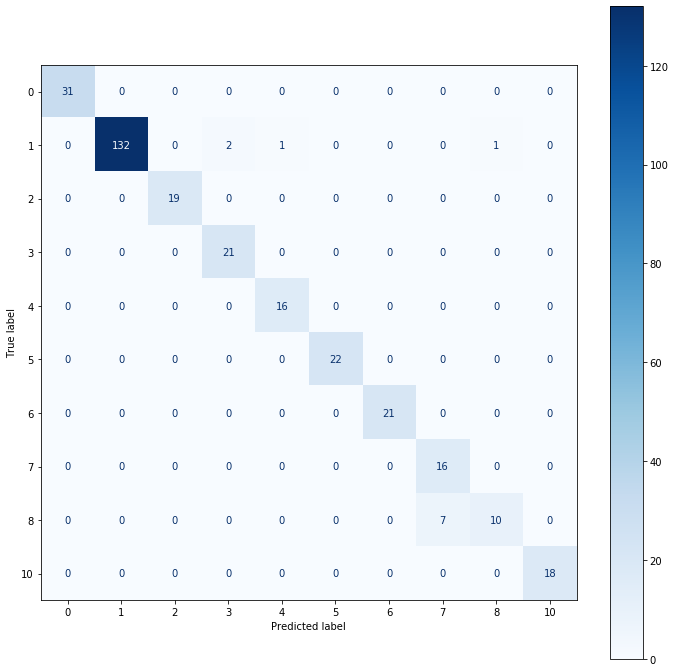

In [25]:
class_names=np.unique(y_test)
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(best_random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,ax=ax)
plt.show()